# Natural resources in the Solow model

In [1]:
import numpy as np
from scipy import optimize
import sympy as sm

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import modelproject

# Model description: Solow model with nautral resources

This section introduces the theoretical foundations of the adapted Solow model with natural resources. It outlines the equations of the neoclassical growth model and extends them to include the dynamics of limited resources and climate change. The model describes how economic growth is influenced not only by traditional factors such as labor, capital, and technology but also by the depletion of natural resources and the resulting environmental damage.

**Equations for the basic Solow model:**
1. Production function (Cobb-Douglas):
$$
Y_t=K_t^{(\alpha)}(A_tL_t)^{(1-\alpha)}
$$
2. Capital accumulation
$$
K_{t+1}=S_t+(1-\delta)K_t,\, 0<\delta<1
$$
3. Laborforce (with constant population growth, n)
$$
L_{t+1}=(1+n)L_t,\, -1<n
$$
4. Tecnological development (with constant tecnological growth rate, g)
$$
A_{t+1}=(1+g)A_t,\, 0<g<1
$$
5. Savings(with constant savings rate)
$$
S_t=sY_t
$$

**Equations changes required for the extensions with nautral resources (from "Introducing advanced Macroeconomics by Hans Whitta and Peter Birch Sørensen, chapter 7):**

6. Production function with extension
$$
Y_t=[1-D_t]K_t^\alpha(A_tL_T)^{1-\beta}E_t^\epsilon,\, \, \alpha,\beta,\epsilon>0,\, \, \, \alpha+\beta+\epsilon=1
$$
7. Climate damages to the production
$$
D_t=1-(\frac{R_t}{R_0})^\phi,\, \, \phi\geq 0
$$
8. Exhaustable resource depletion/development (R)
$$
R_{t+1}=R_t-E_t,\, \, R_0\, \, given
$$
9. Exhaustable resources use
$$
E_t=s_ER_t,\, \, 0<s_E<1
$$

**Capital-output ratio and the transition equation in the extended Solow model (see chapter 7 for derivation):**
10. Capital-output ratio in period t
$$
z_t=\frac{K_t}{Y_t}=\frac{K_t^{1-\alpha}}{(\frac{R_t}{R_0})^\phi(A_tL_T)^\beta E_t^\epsilon}
$$
11. Transition equation of the capital output ratio to period t+1
$$
z_{t+1}=(\frac{1}{1-sE_t})^{\epsilon+\phi}(\frac{1}{(1+n)(1+g)})^\beta(s+(1-\delta)z_t)^{1-\alpha}z_t^\alpha
$$

These equations capture the dynamics of the Solow model with natural resource depletion, providing a framework for analyzing the long-term behavior of an economy facing resource constraints.

**Definition of variables in the basic model**

Labor (L) and Technology (A) are considered exogenous with constant growth rates.
Capital (K) accumulation is influenced by savings and depreciation.

**Definition and importance of variables in the extended model**

Resource (R) represents an exhaustible natural resource whose usage is integral to production but also leads to production damage due to climate change.
Damage (D) reflects the loss in production efficiency due to environmental degradation, modeled as a function of resource usage.

**Economic Implications**:
The inclusion of an exhaustible resource and its impact on production introduces additional complexity to the Solow model, highlighting the trade-offs between economic growth and environmental sustainability.



## Numerical solution

Implementation Details:
This section details the implementation of the Solow model in a Python class, Solowclass, which is used to compute the model’s dynamics through numerical methods.

Solving for Steady States:

Capital Steady State (k): Calculated for the baseline model, this steady state finds the level of capital per effective worker where capital creation through savings balances with the reductions due to depreciation, population growth, and technological advancement.
Capital-Output Ratio Steady State (z): In the extended model, this steady state is computed to reflect the balance between capital input and the adjusted output that accounts for resource depletion and damage.
Methodology:
The steady states are found using root-finding techniques applied to the equilibrium equations specified within the Solowclass. These calculations are crucial for understanding the long-term behavior of the economy under different scenarios.

The steady state for k in the standard Solow model is 4.680802838247644
The steady state for z in the Solow model with an exhaustable resource and climate change is 4.0913116295145855


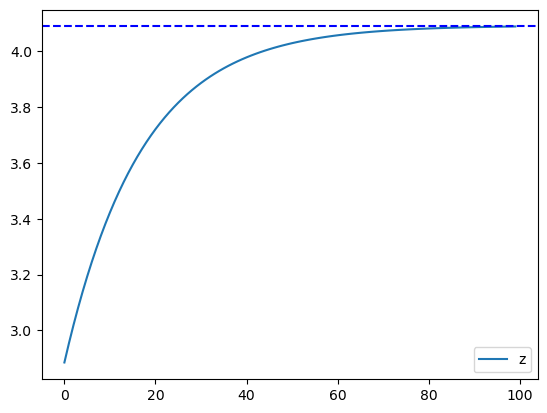

In [14]:
from modelproject import Solowclass

# Initialize the Solow model class
model = Solowclass()

# Set parameter values
model.paramtervalues()

# Solving for steady state for capital in the baseline model
model.solve_ss_k_par(kss=1)

# Solving for steady state for capital-output ratio in the extended model
model.solve_ss_z_par(zss=1)

# Simulating the model
simulation_results = model.simulate(T=100, k0=1, l0=1, a0=1, r0=1)


# Further analysis

**Parameter Sensitivity**:

This analytical section explores how variations in key parameters affect the model's outcomes. Changes in the savings rate (s) and the rate of resource consumption (sE) are tested to examine their impacts on the economy.

**Scenario Simulation**:

The model is re-simulated with adjusted parameters to observe the effects on capital accumulation and the capital-output ratio. This helps in assessing the resilience of the economy to changes in economic policies or resource availability.

**Insights**:

The results provide insights into the potential policy measures that could mitigate the adverse effects of resource depletion and climate change, suggesting more sustainable economic strategies.

Explore the model's behavior under different parameter values or initial conditions, such as varying the savings rate or the rate of resource consumption:

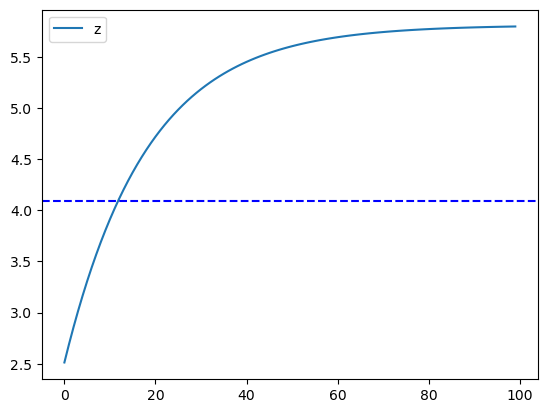

In [15]:
# Adjust parameters and re-simulate to observe different scenarios
model.par.s = 0.4  # Increase savings rate
model.par.sE = 0.01  # Increase the fraction of the resource consumed each period

# Re-run simulation with adjusted parameters
adjusted_simulation_results = model.simulate(T=100, k0=1, l0=1, a0=1, r0=1)


# Plotting and Visualization 
**Data Presentation**:

Visual representations of the simulation results are provided to illustrate the dynamic paths of capital and the capital-output ratio over time. These plots are critical for visually capturing the model's response to different economic conditions.

**Comparative Analysis**:

The Additional plots at the end comparing the original and adjusted simulations highlight the potential effects of policy adjustments or changes in economic behavior. This comparative visualization aids in understanding the practical implications of theoretical modifications to the model.

# Conclusion

This section synthesizes the visual data, providing a clear depiction of the theoretical predictions and empirical observations. It concludes with recommendations or findings derived from the model analysis, emphasizing the balance between economic growth and environmental sustainability.

By structuring your project report with these detailed explanations, you will effectively communicate the complexities and implications of your adapted Solow model, demonstrating both your analytical capabilities and your understanding of economic and environmental interdependencies.

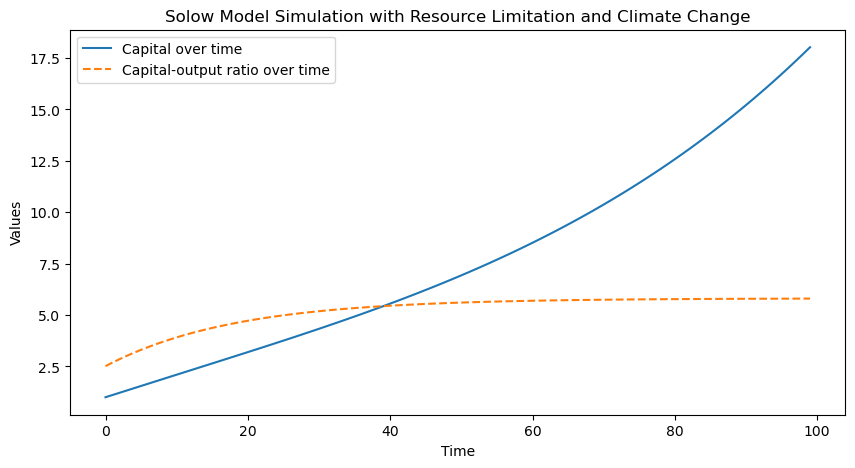

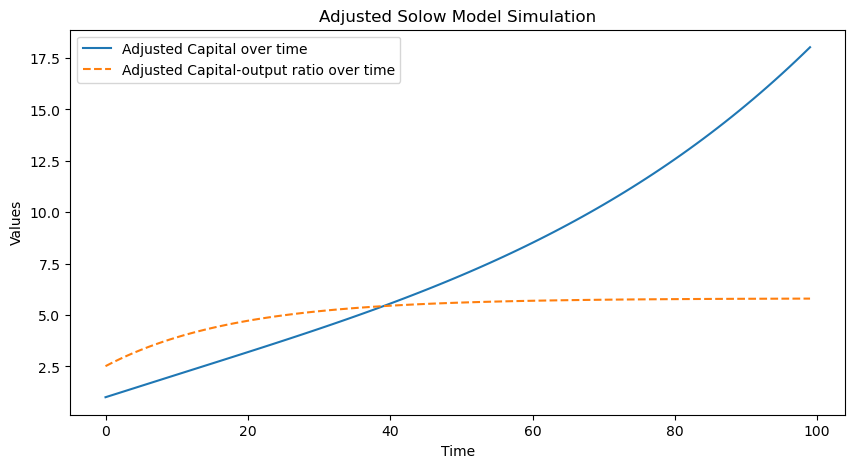

In [16]:
import matplotlib.pyplot as plt

# Plot the original simulation results
plt.figure(figsize=(10, 5))
plt.plot(simulation_results.k, label='Capital over time')
plt.plot(simulation_results.z, label='Capital-output ratio over time', linestyle='--')
plt.title('Solow Model Simulation with Resource Limitation and Climate Change')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()

# Optionally plot the adjusted simulation for comparison
plt.figure(figsize=(10, 5))
plt.plot(adjusted_simulation_results.k, label='Adjusted Capital over time')
plt.plot(adjusted_simulation_results.z, label='Adjusted Capital-output ratio over time', linestyle='--')
plt.title('Adjusted Solow Model Simulation')
plt.xlabel('Time')
plt.ylabel('Values')
plt.legend()
plt.show()
